In [19]:
import nibabel as nib 
import os
import numpy as np
import argparse
import medpy.metric.binary as medpyMetrics
import matplotlib.pyplot as plt
import cv2
gtpath = '../../../dataset/Mydataset/labels'
exps={'base':'../../exp/prediction/Baseline1/',
'rev':'../../exp/prediction/Reversible1',
'Com':'../../exp/prediction/ReversibleCom1',
'Dia':"../../exp/prediction/ReversibleDia1",
 'topk':"../../exp/prediction/ReversibleTopk1"}
imgpath = '../../../dataset/Mydataset/test'
def trans2gtshape(t,pred):
    s = pred.shape
    if len(s)>len(t):
        pred = pred.squeeze()
    newp = np.zeros(t)
    newp[:min(s[0],t[0]),:min(s[1],t[1]),:min(s[2],t[2])] = pred[:min(s[0],t[0]),:min(s[1],t[1]),:min(s[2],t[2])]
    return newp
def show_slices(slices,segs):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        h,w = slice.T.shape
        nom = np.max(slice.T)
        seg = segs[i]
        img = np.zeros([h,w,3])
        for x in range(w):
            for y in range(h):
                if seg[x,y]==1:
                    img[y,x,:]=[255,0,0]#red for A
                elif seg[x,y]==2:
                    img[y,x,:]=[0,255,0]#green for P
                else:
                    val = slice.T[y,x]/nom
                    img[y,x,:]=[val,val,val]
        axes[i].imshow(img, origin="lower")


In [13]:
def softDice(pred, target, smoothing=1, nonSquared=False):
    intersection = (pred * target).sum()
    if nonSquared:
        union = (pred).sum() + (target).sum()
    else:
        union = (pred * pred).sum() + (target * target).sum()
    dice = (2 * intersection + smoothing) / (union + smoothing)

    return dice.mean()

def cal_single_dice(gt,pd):
    A = pd == 1
    P = pd == 2
    Amask = gt == 1
    Pmask = gt == 2
    Adice = softDice(A, Amask, 0, True)
    Pdice = softDice(P, Pmask, 0, True)
    return Adice,Pdice,(Adice+Pdice)/2

In [15]:
def load_exp_img(exp,name):
    img = nib.load(os.path.join(imgpath,name,name+'.nii.gz'))
    label = nib.load(os.path.join(exps[exp],name+'.nii.gz'))
    data = img.get_fdata()
    seg = label.get_fdata()
    h,w,d = data.shape
    seg = trans2gtshape([h,w,d],seg)
    slices = [data[h//2,:,:],data[:,w//2,:],data[:,:,d//2]]
    segs = [seg[h//2,:,:],seg[:,w//2,:],seg[:,:,d//2]]
    show_slices(slices,segs)
    return cal_single_dice(gt,seg)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


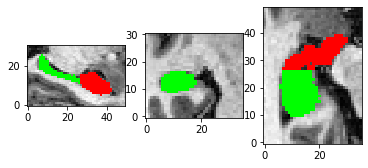

In [16]:
img = nib.load(os.path.join(imgpath,name,name+'.nii.gz'))
label = nib.load(os.path.join(gtpath,name+'_seg.nii.gz'))
data = img.get_fdata()
gt = label.get_fdata()
h,w,d = data.shape
slices = [data[h//2,:,:],data[:,w//2,:],data[:,:,d//2]]
segs = [gt[h//2,:,:],gt[:,w//2,:],gt[:,:,d//2]]
show_slices(slices,segs)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


rev
(0.860633484162896, 0.8599931200550396, 0.8603133021089677)
Com
(0.8486897717666948, 0.8354782608695652, 0.84208401631813)
Dia


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0.8588342440801457, 0.8163265306122449, 0.8375803873461953)


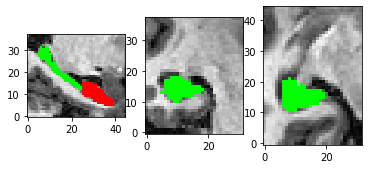

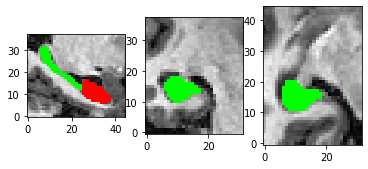

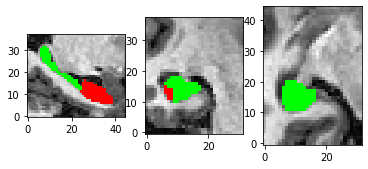

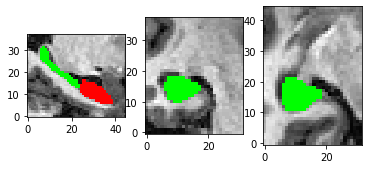

In [28]:
names=["t2"]#["hippocampus_064","hippocampus_127","hippocampus_343"]
exp_names=['rev','Com','Dia']
for name in names:
    img = nib.load(os.path.join(imgpath,name,name+'.nii.gz'))
    label = nib.load(os.path.join(gtpath,name+'_seg.nii.gz'))
    data = img.get_fdata()
    gt = label.get_fdata()
    h,w,d = data.shape
    slices = [data[h//2,:,:],data[:,w//2,:],data[:,:,d//2]]
    segs = [gt[h//2,:,:],gt[:,w//2,:],gt[:,:,d//2]]
    show_slices(slices,segs)
    for exp in exp_names:
        print(exp)
        res=load_exp_img(exp,name)
        print(res)